# Exploratory Data Analysis - Telco Churn Data Set

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [73]:
# Data cleaning & pre-processing for visualization 

#Replacing spaces with null values in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

#convert to float type
df["TotalCharges"] = df["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})
    
#replace values in SeniorCitizen Column
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Tenure to categorical column, we want to group customers for better visualization. 
def tenure_lab(df) :
    
    if df["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "Tenure_48-60"
    elif df["tenure"] > 60 :
        return "Tenure_gt_60"
    
df["tenure_group"] = df.apply(lambda df:tenure_lab(df),axis = 1)

#print(df['tenure_group'].value_counts())

tenureGroups = df['tenure_group'].value_counts().keys().tolist()
tenureGroupsvals = df['tenure_group'].value_counts().values.tolist()

In [53]:
#Separating categorical columns and numerical columns.    

Id_col = ['customerID']
target_col = ['Churn']
gender = ['gender']

#Using 6 to separate, because we have 5 tenure groups as categorical max unique values. 
categorical_cols = df.nunique()[df.nunique() < 6].keys().tolist()

#Omitting the target from categorical columns.

cat_cols = [x for x in categorical_cols if x not in target_col + gender]
#print(cat_cols)

num_cols = [x for x in df.columns if x not in target_col + Id_col + cat_cols]
#print(num_cols)

In [54]:
# Separating churned customers from not churned onces. 
Churn = df[df['Churn'] == 'Yes']['Churn']
NoChurn = df[df['Churn'] == 'No']['Churn']

#labels
lab = df["Churn"].value_counts().keys().tolist()
#values
val = df["Churn"].value_counts().values.tolist()

In [55]:
# This function converts a dataframes column to labels and values for plotting. 

def toLabelsAndValues(dataframe,column):
    
    labels = dataframe[column].value_counts().keys().tolist()
    
    values = dataframe[column].value_counts().values.tolist()
    
    return labels, values 

toLabelsAndValues(df,'Churn')

(['No', 'Yes'], [5163, 1869])

In [56]:
# Function for all categorical columns to plot against the target in order to find insights. 

def plot_bar(column):
    
    f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)
    
    ax = sns.barplot(x=Churn[column].value_counts().keys().tolist(), 
                              y=Churn[column].value_counts().values.tolist(), palette="rocket",ax=ax)
    
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title('Churned customers and '+ column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_ylabel("N Customers")
    
    #total = p.get_height()

    #for p in ax.patches:
        #percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        #x = p.get_x() + p.get_width() + 0.02
        #y = p.get_y() + p.get_height()/2
        #ax.annotate(percentage, (x,y))
    
    ax1 = sns.barplot(x=NoChurn[column].value_counts().keys().tolist(),
                      y=NoChurn[column].value_counts().values.tolist(), palette="rocket",ax=ax1)
    
    ax1.axhline(0, color="k", clip_on=False)
    ax1.set_title('NOT Churned customers and '+ column)
    ax1.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax1.set_ylabel("N Customers")

KeyError: 'gender'

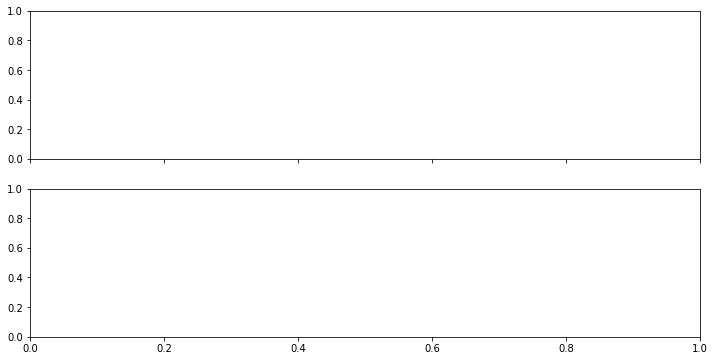

In [41]:
#for all categorical columns plot bar chart.

for column in cat_cols:
    plot_bar(column)

## Customers that have not churned vs. churned

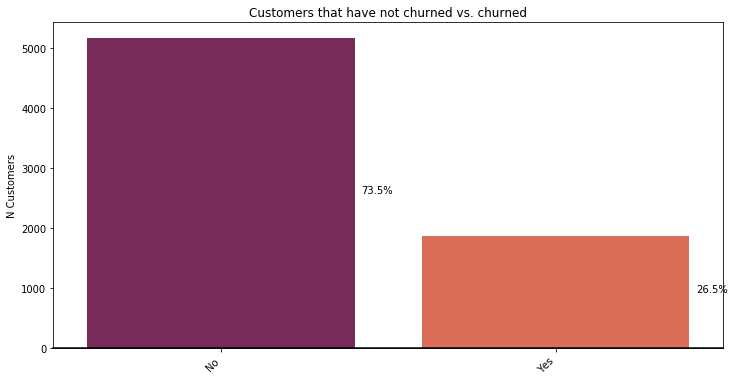

In [6]:
f,ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=lab, y=val, palette="rocket")
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers that have not churned vs. churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalCustomers = len(df)
total = TotalCustomers

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))


# We can see that the majority of customers did not churn. 
# 26.54 % of the customers churned. 

In [9]:
print(df['tenure_group'].value_counts())

tenureGroups = df['tenure_group'].value_counts().keys().tolist()
tenureGroupsvals = df['tenure_group'].value_counts().values.tolist()

Tenure_0-12     2186
Tenure_24-48    1594
Tenure_gt_60    1407
Tenure_12-24    1024
Tenure_48-60     832
Name: tenure_group, dtype: int64


## Total amount of Months customers were subscribed to the Telco Company

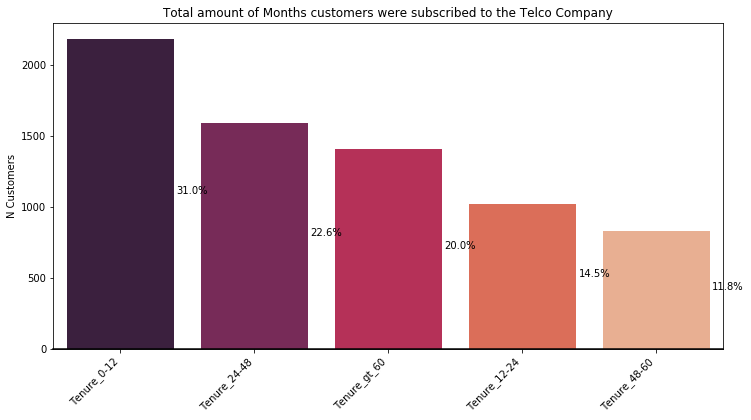

In [10]:
f,ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=tenureGroups, y=tenureGroupsvals, palette="rocket")
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Total amount of Months customers were subscribed to the Telco Company')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalCustomers = len(df)
total = TotalCustomers

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

# Most customers were subscribed 0 to 12 months. The longer the subscription time the less customers.

In [11]:
ChurnPerTenureGroup = Churn.groupby(df['tenure_group']).value_counts().values.tolist()
NoChurnPerTenureGroup = NoChurn.groupby(df['tenure_group']).value_counts().values.tolist()

## Customer Churn and no Churn per Tenure Group (in Months)

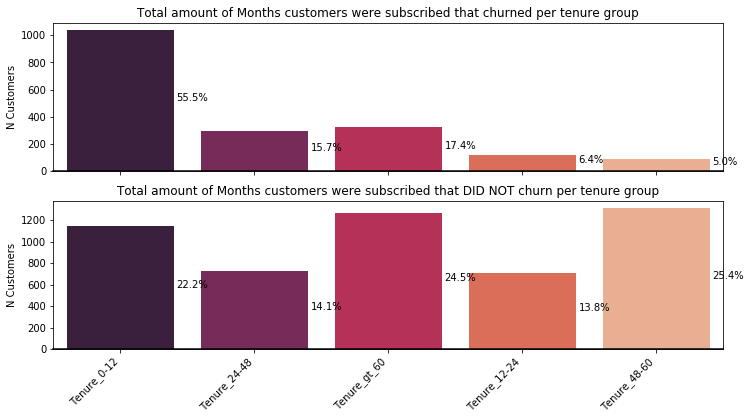

In [12]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=tenureGroups, y=ChurnPerTenureGroup, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Total amount of Months customers were subscribed that churned per tenure group')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerTenureGroup = ChurnPerTenureGroup[0] + ChurnPerTenureGroup[1] + ChurnPerTenureGroup[2] + ChurnPerTenureGroup[3] + ChurnPerTenureGroup[4]
total = TotalChurnPerTenureGroup

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=tenureGroups, y=NoChurnPerTenureGroup, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Total amount of Months customers were subscribed that DID NOT churn per tenure group')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerTenureGroup = NoChurnPerTenureGroup[0] + NoChurnPerTenureGroup[1] + NoChurnPerTenureGroup[2] + NoChurnPerTenureGroup[3] + NoChurnPerTenureGroup[4]
total1 = TotalNoChurnPerTenureGroup

for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x,y))

# We can observe the overall trend is customers that churn less often the longer they are subscribed.  

# Most churns happen in the segments 0-12 months, more than 60 months and 48-60 months. 

## Customer Gender in Churn vs. no Churn 

In [16]:
# Preparing the Churn for Gender Column to be plotted. 
gender_labels = df['gender'].value_counts().keys().tolist()
gender_values = df['gender'].value_counts().values.tolist()
ChurnPerGender = Churn.groupby(df['gender']).value_counts().values.tolist()
NoChurnPerGender = NoChurn.groupby(df['gender']).value_counts().values.tolist()

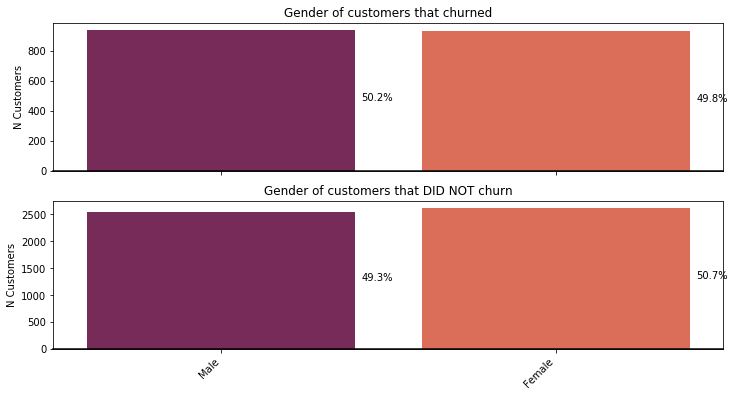

In [17]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=gender_labels, y=ChurnPerGender, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Gender of customers that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerGender = ChurnPerGender[0] + ChurnPerGender[1]
total = TotalChurnPerGender

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=gender_labels, y=NoChurnPerGender, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Gender of customers that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerGender = NoChurnPerGender[0] + NoChurnPerGender[1]
total1 = TotalNoChurnPerGender
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))
        
# We can see that the Gender of Customers that Churn and that don't churn is close to a 50/50 distribution.
# Hence, when developing a strategy against churn, focus on gender would not matter. 

## Senior Citizens in Churn vs. no Churn 

In [60]:
# Preparing the SeniorCitizen Column to be plotted. 
sc_labels = df['SeniorCitizen'].value_counts().keys().tolist()
sc_values = df['SeniorCitizen'].value_counts().values.tolist()
ChurnPerSc = Churn.groupby(df['SeniorCitizen']).value_counts().values.tolist()
NoChurnPerSc = NoChurn.groupby(df['SeniorCitizen']).value_counts().values.tolist()

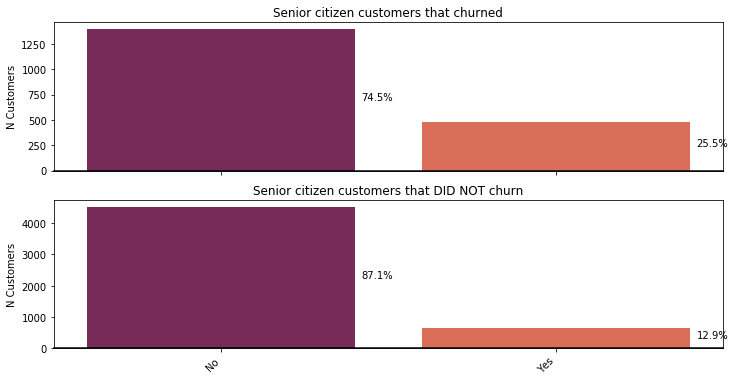

In [66]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=sc_labels, y=ChurnPerSc, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Senior citizen customers that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerSc = ChurnPerSc[0] + ChurnPerSc[1]
total = TotalChurnPerSc

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=sc_labels, y=NoChurnPerSc, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Senior citizen customers that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerSc = NoChurnPerSc[0] + NoChurnPerSc[1]
total1 = TotalNoChurnPerSc
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))
        
# Out of the total of 1869 customers that churned 74.5 % are senior citizens. This means that a customer loyalty
# programme or strategy should clearly address the needs of the elderly in order to retain them.

## Partner in Churn vs. no Churn

In [69]:
# Preparing the Partner Column to be plotted. 
p_labels = df['Partner'].value_counts().keys().tolist()
p_values = df['Partner'].value_counts().values.tolist()
ChurnPerP = Churn.groupby(df['Partner']).value_counts().values.tolist()
NoChurnPerP = NoChurn.groupby(df['Partner']).value_counts().values.tolist()

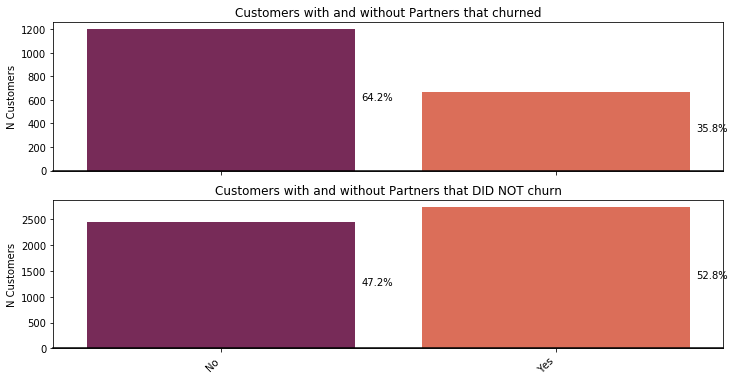

In [71]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=p_labels, y=ChurnPerP, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers with and without Partners that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerP = ChurnPerP[0] + ChurnPerP[1]
total = TotalChurnPerP

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=p_labels, y=NoChurnPerP, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Customers with and without Partners that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerP = NoChurnPerP[0] + NoChurnPerP[1]
total1 = TotalNoChurnPerP
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))
        
# 64.2% of customers that churned did not have a partner. A loyalty / retainment strategy should therefore
# primarily focus on customers that do not have partners. 

## Dependents in Churn vs. no Churn

In [75]:
# Preparing the Dependents Column to be plotted. 
d_labels = df['Dependents'].value_counts().keys().tolist()
d_values = df['Dependents'].value_counts().values.tolist()
ChurnPerD = Churn.groupby(df['Dependents']).value_counts().values.tolist()
NoChurnPerD = NoChurn.groupby(df['Dependents']).value_counts().values.tolist()

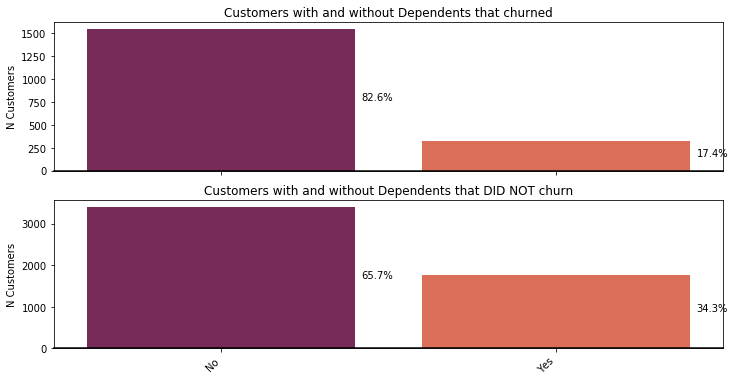

In [77]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=d_labels, y=ChurnPerD, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers with and without Dependents that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerD = ChurnPerD[0] + ChurnPerD[1]
total = TotalChurnPerD

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=d_labels, y=NoChurnPerD, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Customers with and without Dependents that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerD = NoChurnPerD[0] + NoChurnPerD[1]
total1 = TotalNoChurnPerD
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))
        
# 82.6% of customers that churned do have dependents. Therefore a loyalty programme or retainment strategy
# could include dependents in a strategical way. 

## Phone Service in Churn vs. no Churn 

In [83]:
# Preparing the Dependents Column to be plotted. 
ps_labels = df['PhoneService'].value_counts().keys().tolist()
ps_values = df['PhoneService'].value_counts().values.tolist()
ChurnPerPS = Churn.groupby(df['PhoneService']).value_counts().values.tolist()
NoChurnPerPS = NoChurn.groupby(df['PhoneService']).value_counts().values.tolist()
print(ChurnPerPS)
print(NoChurnPerPS)

[170, 1699]
[510, 4653]


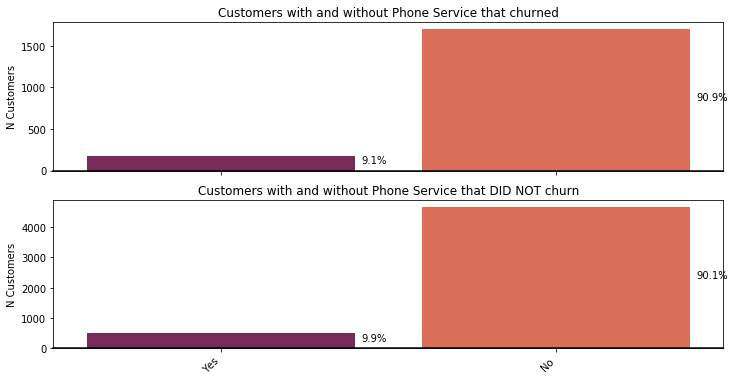

In [84]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=ps_labels, y=ChurnPerPS, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers with and without Phone Service that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerPS = ChurnPerPS[0] + ChurnPerPS[1]
total = TotalChurnPerPS

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=ps_labels, y=NoChurnPerPS, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Customers with and without Phone Service that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerPS = NoChurnPerPS[0] + NoChurnPerPS[1]
total1 = TotalNoChurnPerPS
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))
        
# 90.9% of customers that churned did not have the phone service. Hence, the telco company should try to 
# sell its customers more consistently the phone service, but it is unlikely to reduce churn, because 
# customers that did not churn also have no phone service (90.1%).

## Multiple Lines in Churn vs. no Churn

In [88]:
# Merging category 'no phone service into no because if a customer doesn't have the phone service he or she
# can't have multiple lines.

df['MultipleLines']  = df['MultipleLines'].replace({'No phone service' : 'No'})

# Preparing the 'MultipleLines' Column to be plotted. 
ms_labels = df['MultipleLines'].value_counts().keys().tolist()
ms_values = df['MultipleLines'].value_counts().values.tolist()
ChurnPerMS = Churn.groupby(df['MultipleLines']).value_counts().values.tolist()
NoChurnPerMS = NoChurn.groupby(df['MultipleLines']).value_counts().values.tolist()
print(ChurnPerMS)
print(NoChurnPerMS)
print(ms_labels)

[1019, 850]
[3046, 2117]
['No', 'Yes']


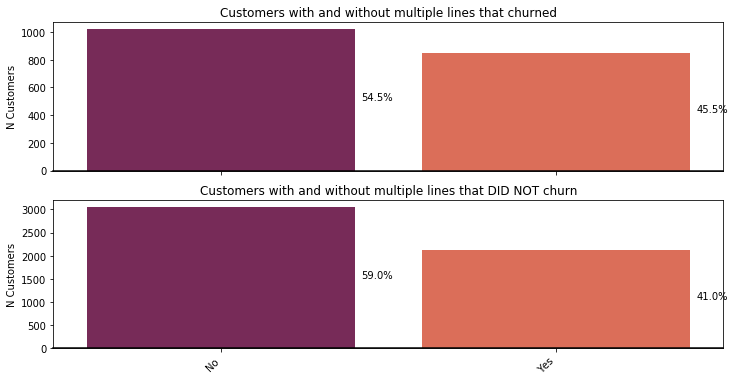

In [90]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=ms_labels, y=ChurnPerMS, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers with and without multiple lines that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerMS = ChurnPerMS[0] + ChurnPerMS[1]
total = TotalChurnPerMS

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=ms_labels, y=NoChurnPerMS, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Customers with and without multiple lines that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerMS = NoChurnPerMS[0] + NoChurnPerMS[1]
total1 = TotalNoChurnPerMS
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))
        
# 54.5% of customers that churned had no multiple lines or no phone service at all. 
# This represents an opportunity for the telco company to sell more phone service and multiple line packages
# but is unlikely to affect the churn rate because the distribution is relatively even also within customers that
# did not churn. 

## Internet Service in Churn vs. no Churn

In [91]:
# Preparing the 'InternetService' Column to be plotted. 
is_labels = df['InternetService'].value_counts().keys().tolist()
is_values = df['InternetService'].value_counts().values.tolist()
ChurnPerIS = Churn.groupby(df['InternetService']).value_counts().values.tolist()
NoChurnPerIS = NoChurn.groupby(df['InternetService']).value_counts().values.tolist()
print(ChurnPerIS)
print(NoChurnPerIS)
print(is_labels)

[459, 1297, 113]
[1957, 1799, 1407]
['Fiber optic', 'DSL', 'No']


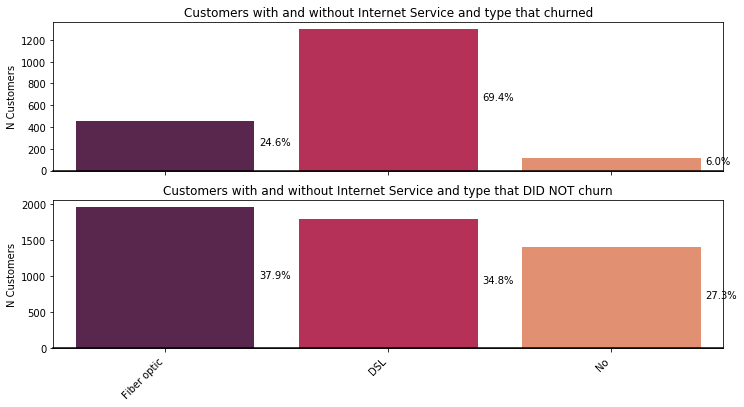

In [100]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=is_labels, y=ChurnPerIS, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers with and without Internet Service and type that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerIS = ChurnPerIS[0] + ChurnPerIS[1] + ChurnPerIS[2]
total = TotalChurnPerIS

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=is_labels, y=NoChurnPerIS, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Customers with and without Internet Service and type that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerIS = NoChurnPerIS[0] + NoChurnPerIS[1] + NoChurnPerIS[2]
total1 = TotalNoChurnPerIS
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))
        
# 69.4% of customers that churned had DSL internet service. This indicates a potential upselling opportunity for
# the telco company to try to switch customers from DSL to Fiber Optic. It could also indicate potential issues
# with the DSL internet service the telco company is providing. 

## Online Security in Churn vs. no Churn

In [94]:
# Preparing the 'OnlineSecurity' Column to be plotted. 
os_labels = df['OnlineSecurity'].value_counts().keys().tolist()
os_values = df['OnlineSecurity'].value_counts().values.tolist()
ChurnPerOS = Churn.groupby(df['OnlineSecurity']).value_counts().values.tolist()
NoChurnPerOS = NoChurn.groupby(df['OnlineSecurity']).value_counts().values.tolist()
print(ChurnPerOS)
print(NoChurnPerOS)
print(os_labels)

[1574, 295]
[3443, 1720]
['No', 'Yes']


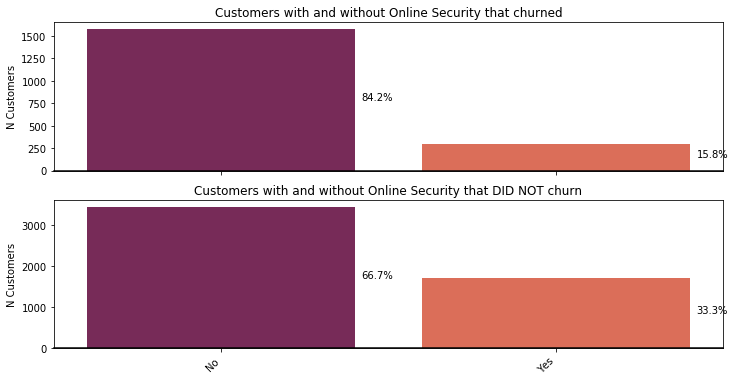

In [96]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=os_labels, y=ChurnPerOS, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers with and without Online Security that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerOS = ChurnPerOS[0] + ChurnPerOS[1]
total = TotalChurnPerOS

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=os_labels, y=NoChurnPerOS, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Customers with and without Online Security that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerOS = NoChurnPerOS[0] + NoChurnPerOS[1]
total1 = TotalNoChurnPerOS
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))
        
# 84.2% of customers that churned had no online security service. This offers another opportunity for the 
# Telco company to upsell its online security offering to the customers with internet service.
# However it is unlikely that this measure will reduce churn since 66.7% of non churned customers also do not
# have online security. 

## Online Backup in Churn vs. no Churn

In [97]:
# Preparing the 'OnlineBackup' Column to be plotted. 
ob_labels = df['OnlineBackup'].value_counts().keys().tolist()
ob_values = df['OnlineBackup'].value_counts().values.tolist()
ChurnPerOB = Churn.groupby(df['OnlineBackup']).value_counts().values.tolist()
NoChurnPerOB = NoChurn.groupby(df['OnlineBackup']).value_counts().values.tolist()
print(ChurnPerOB)
print(NoChurnPerOB)
print(ob_labels)

[1346, 523]
[3261, 1902]
['No', 'Yes']


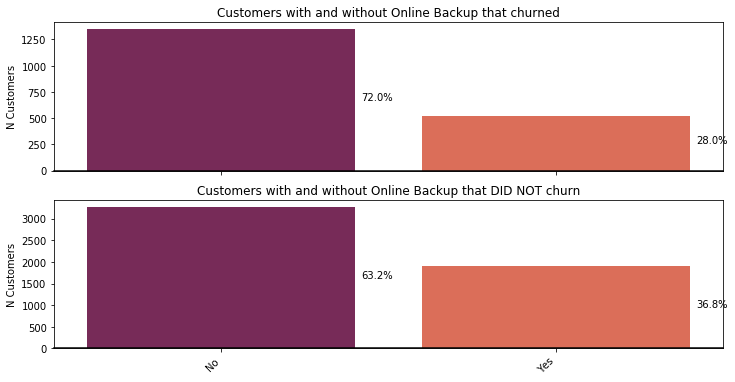

In [101]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=ob_labels, y=ChurnPerOB, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers with and without Online Backup that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerOB = ChurnPerOB[0] + ChurnPerOB[1]
total = TotalChurnPerOB

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=ob_labels, y=NoChurnPerOB, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Customers with and without Online Backup that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerOB = NoChurnPerOB[0] + NoChurnPerOB[1]
total1 = TotalNoChurnPerOB
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))

# 72% of customers that churned did not have the service online backup. This again only offers an upselling or
# cross-selling potential because churn is unlikely to be reduced with this, since 63.2% of the customer base
# that didn't churn also doesn't have the online backup service. 

  ## Device Protection in Churn vs. no Churn

In [102]:
# Preparing the 'OnlineBackup' Column to be plotted. 
dp_labels = df['DeviceProtection'].value_counts().keys().tolist()
dp_values = df['DeviceProtection'].value_counts().values.tolist()
ChurnPerDP = Churn.groupby(df['DeviceProtection']).value_counts().values.tolist()
NoChurnPerDP = NoChurn.groupby(df['DeviceProtection']).value_counts().values.tolist()
print(ChurnPerDP)
print(NoChurnPerDP)
print(dp_labels)

[1324, 545]
[3290, 1873]
['No', 'Yes']


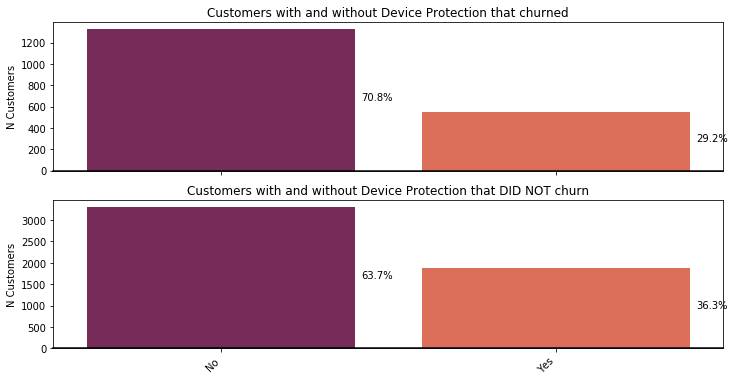

In [104]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=dp_labels, y=ChurnPerDP, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers with and without Device Protection that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerDP = ChurnPerDP[0] + ChurnPerDP[1]
total = TotalChurnPerDP

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=dp_labels, y=NoChurnPerDP, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Customers with and without Device Protection that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerDP = NoChurnPerDP[0] + NoChurnPerDP[1]
total1 = TotalNoChurnPerDP
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))
        
# 70.8% of customers that churned did not have the device protection service. However also 63.7% of customers
# that did not churn also don't have the device protection, hence impact on churn most likely low. 

## TechSupport in Churn vs. no Churn

In [105]:
# Preparing the 'TechSupport' Column to be plotted. 
ts_labels = df['TechSupport'].value_counts().keys().tolist()
ts_values = df['TechSupport'].value_counts().values.tolist()
ChurnPerTS = Churn.groupby(df['TechSupport']).value_counts().values.tolist()
NoChurnPerTS = NoChurn.groupby(df['TechSupport']).value_counts().values.tolist()
print(ChurnPerTS)
print(NoChurnPerTS)
print(ts_labels)

[1559, 310]
[3433, 1730]
['No', 'Yes']


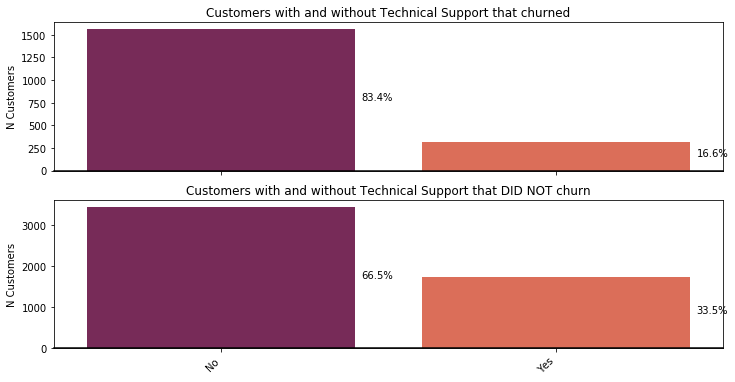

In [107]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=ts_labels, y=ChurnPerTS, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers with and without Technical Support that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerTS = ChurnPerTS[0] + ChurnPerTS[1]
total = TotalChurnPerTS

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=ts_labels, y=NoChurnPerTS, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Customers with and without Technical Support that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerTS = NoChurnPerTS[0] + NoChurnPerTS[1]
total1 = TotalNoChurnPerTS
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))
        
# 83.4% of customers that churned had no technical support service booked. Again this feature is not a good
# indicator for churn reduction since 66.5% of the existing customers also does not pay for this service.

## Streaming TV in Churn vs. no Churn

In [109]:
# Preparing the 'StreamingTV' Column to be plotted. 
st_labels = df['StreamingTV'].value_counts().keys().tolist()
st_values = df['StreamingTV'].value_counts().values.tolist()
ChurnPerST = Churn.groupby(df['StreamingTV']).value_counts().values.tolist()
NoChurnPerST = NoChurn.groupby(df['StreamingTV']).value_counts().values.tolist()
print(ChurnPerST)
print(NoChurnPerST)
print(st_labels)

[1055, 814]
[3274, 1889]
['No', 'Yes']


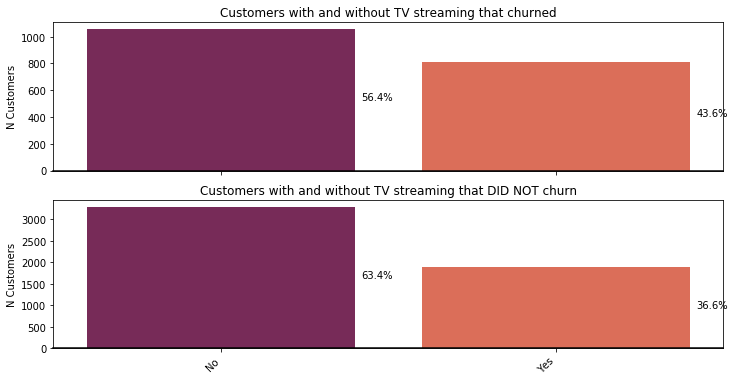

In [111]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=st_labels, y=ChurnPerST, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers with and without TV streaming that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerST = ChurnPerST[0] + ChurnPerST[1]
total = TotalChurnPerST

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=st_labels, y=NoChurnPerST, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Customers with and without TV streaming that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerST = NoChurnPerST[0] + NoChurnPerST[1]
total1 = TotalNoChurnPerST
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))

# 56.4% of customers that churned did not have the TV streaming service.

## Streaming Movies in Churn vs. no Churn

In [112]:
# Preparing the 'StreamingMovies' Column to be plotted. 
sm_labels = df['StreamingMovies'].value_counts().keys().tolist()
sm_values = df['StreamingMovies'].value_counts().values.tolist()
ChurnPerSM = Churn.groupby(df['StreamingMovies']).value_counts().values.tolist()
NoChurnPerSM = NoChurn.groupby(df['StreamingMovies']).value_counts().values.tolist()
print(ChurnPerSM)
print(NoChurnPerSM)
print(sm_labels)

[1051, 818]
[3250, 1913]
['No', 'Yes']


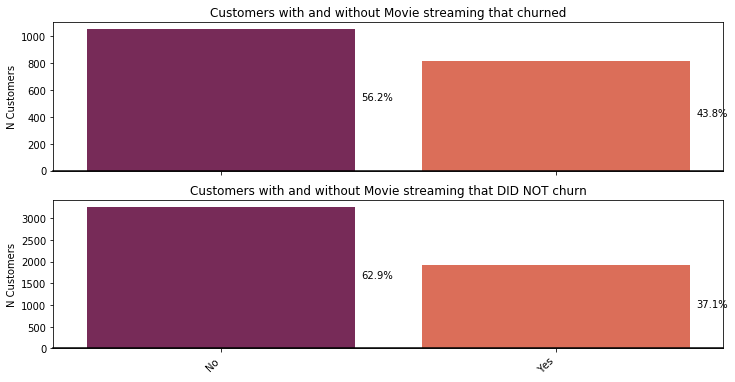

In [114]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=sm_labels, y=ChurnPerSM, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers with and without Movie streaming that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerSM = ChurnPerSM[0] + ChurnPerSM[1]
total = TotalChurnPerSM

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=sm_labels, y=NoChurnPerSM, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Customers with and without Movie streaming that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerSM = NoChurnPerSM[0] + NoChurnPerSM[1]
total1 = TotalNoChurnPerSM
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))

# 56.2% of customers that churned did not have the Movie streaming service. 

   ## Contract type in Churn vs. no Churn

In [115]:
# Preparing the 'Contract' Column to be plotted. 
c_labels = df['Contract'].value_counts().keys().tolist()
c_values = df['Contract'].value_counts().values.tolist()
ChurnPerC = Churn.groupby(df['Contract']).value_counts().values.tolist()
NoChurnPerC = NoChurn.groupby(df['Contract']).value_counts().values.tolist()
print(ChurnPerC)
print(NoChurnPerC)
print(c_labels)

[1655, 166, 48]
[2220, 1306, 1637]
['Month-to-month', 'Two year', 'One year']


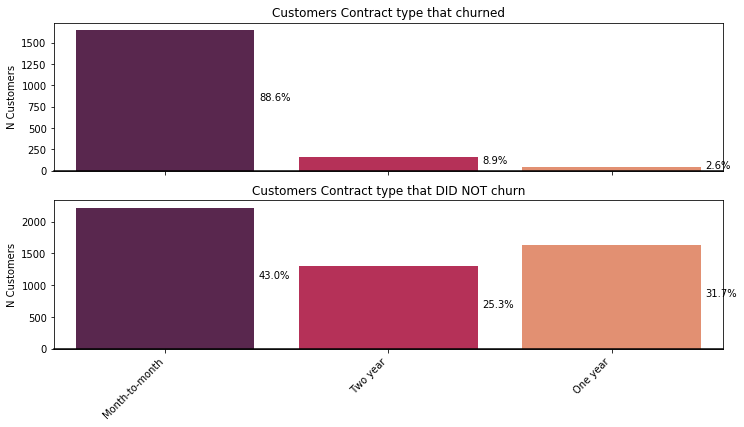

In [118]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=c_labels, y=ChurnPerC, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers Contract type that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerC = ChurnPerC[0] + ChurnPerC[1] + ChurnPerC[2]
total = TotalChurnPerC

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=c_labels, y=NoChurnPerC, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Customers Contract type that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerC = NoChurnPerC[0] + NoChurnPerC[1] + NoChurnPerC[2]
total1 = TotalNoChurnPerC
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))
        
# 88.6% of customers that churned were paying on a monthly basis. This fact indicates that the telco company
# should try to convert customers into the more long term contract agreements since churn is significantly
# lower within the one or two year contract types. 

## Paperless Billing in Churn vs. no Churn

In [119]:
# Preparing the 'PaperlessBilling' Column to be plotted. 
pl_labels = df['PaperlessBilling'].value_counts().keys().tolist()
pl_values = df['PaperlessBilling'].value_counts().values.tolist()
ChurnPerPL = Churn.groupby(df['PaperlessBilling']).value_counts().values.tolist()
NoChurnPerPL = NoChurn.groupby(df['PaperlessBilling']).value_counts().values.tolist()
print(ChurnPerPL)
print(NoChurnPerPL)
print(pl_labels)

[469, 1400]
[2395, 2768]
['Yes', 'No']


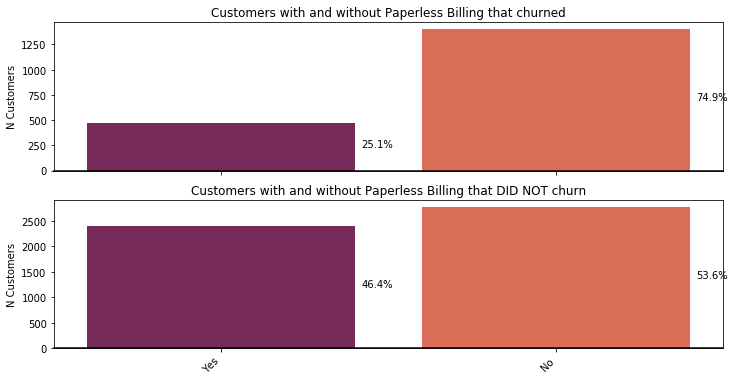

In [122]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=pl_labels, y=ChurnPerPL, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers with and without Paperless Billing that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerPL = ChurnPerPL[0] + ChurnPerPL[1] 
total = TotalChurnPerPL

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=pl_labels, y=NoChurnPerPL, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Customers with and without Paperless Billing that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerPL = NoChurnPerPL[0] + NoChurnPerPL[1]
total1 = TotalNoChurnPerPL
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))

# 74.9% of customers that churned did not have paperless billing, strongly indicating that this does affect the
# churn rate and should be therefore addressed by the telco company.

## Payment Method in Churn vs. no Churn

In [123]:
# Preparing the 'PaymentMethod' Column to be plotted. 
pm_labels = df['PaymentMethod'].value_counts().keys().tolist()
pm_values = df['PaymentMethod'].value_counts().values.tolist()
ChurnPerPM = Churn.groupby(df['PaymentMethod']).value_counts().values.tolist()
NoChurnPerPM = NoChurn.groupby(df['PaymentMethod']).value_counts().values.tolist()
print(ChurnPerPM)
print(NoChurnPerPM)
print(pm_labels)

[258, 232, 1071, 308]
[1284, 1289, 1294, 1296]
['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']


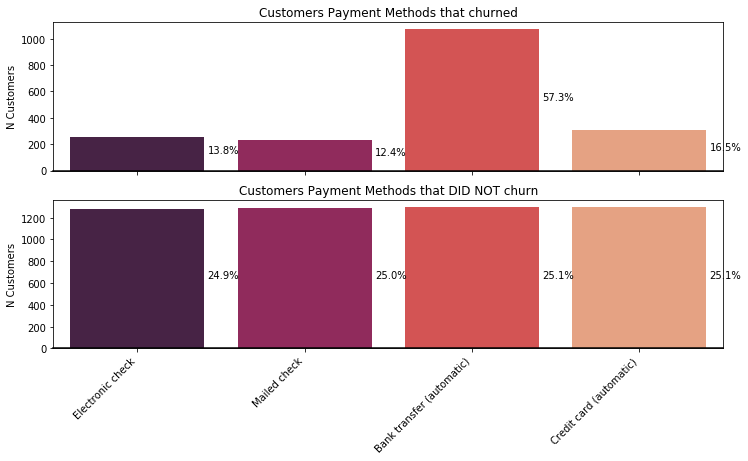

In [125]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=pm_labels, y=ChurnPerPM, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers Payment Methods that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerPM = ChurnPerPM[0] + ChurnPerPM[1] + ChurnPerPM[2] + ChurnPerPM[3]
total = TotalChurnPerPM

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=pm_labels, y=NoChurnPerPM, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Customers Payment Methods that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerPM = NoChurnPerPM[0] + NoChurnPerPM[1] + NoChurnPerPM[2] + NoChurnPerPM[3]
total1 = TotalNoChurnPerPM
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))
        
# 57.3% of customers that churned used the automatic bank transfer payment method, indicating that
# the telco company should try to incentivize its customers to use one of the other three options. 

## 

In [127]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     44
19.90     44
19.95     44
19.65     43
          ..
92.35      1
35.60      1
72.85      1
67.70      1
113.30     1
Name: MonthlyCharges, Length: 1584, dtype: int64

In [126]:
num_cols

['gender', 'tenure', 'MonthlyCharges', 'TotalCharges']